c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

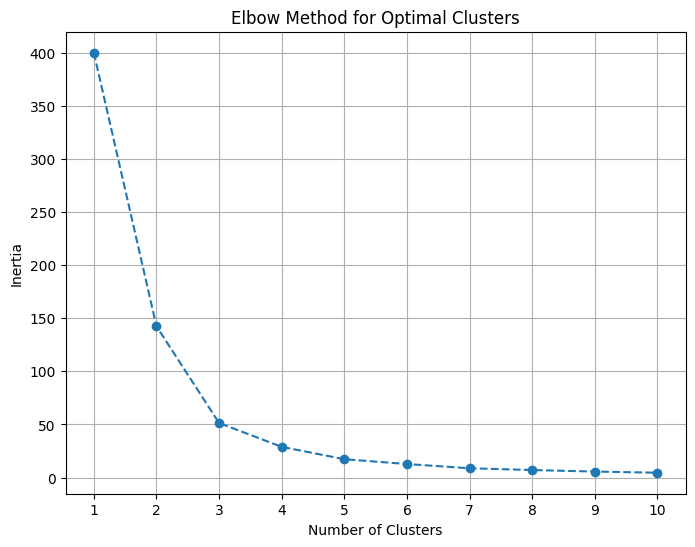

c:\Users\surva\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


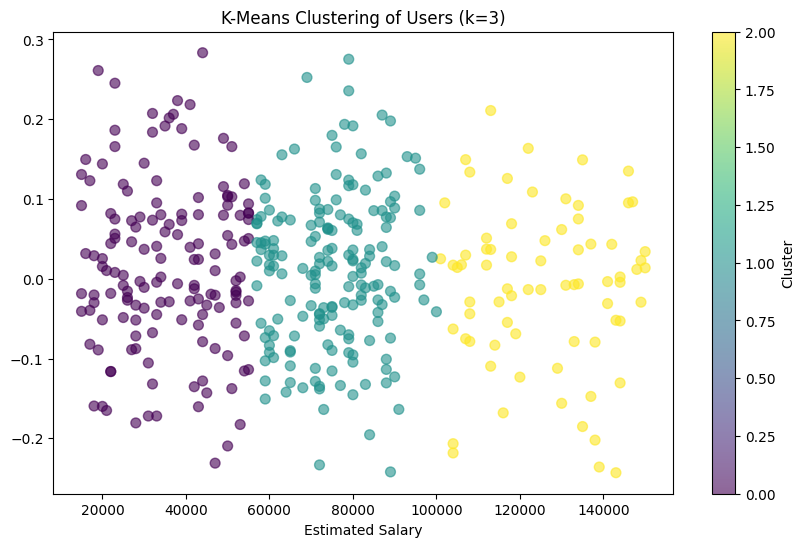

   EstimatedSalary  Cluster
0            19000        0
1            20000        0
2            43000        0
3            57000        1
4            76000        1


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Data Preprocessing
# Check for missing values and handle them (drop rows with missing values for simplicity)
data = data.dropna()

# If there are categorical features, apply Label Encoding (e.g., 'Gender' column)
if 'Gender' in data.columns:
    label_encoder = LabelEncoder()
    data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Select features for clustering: we'll use 'EstimatedSalary' here
X = data[['EstimatedSalary']]

# Feature Scaling (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the optimal number of clusters
inertias = []
for k in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow graph to determine optimal clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the Elbow plot, let's assume 3 clusters are optimal (you can change this after inspecting the plot)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters to visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(data['EstimatedSalary'], np.random.normal(0, 0.1, len(data)), c=data['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Estimated Salary')
plt.title(f'K-Means Clustering of Users (k={optimal_clusters})')
plt.show()

# Show the first few rows with cluster labels
print(data[['EstimatedSalary', 'Cluster']].head())
